<a href="https://colab.research.google.com/github/Dospalko/datascience/blob/main/Linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
#load data
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [11]:
N, D = X_train.shape

In [12]:
N,D

(381, 30)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train,X_test

(array([[ 0.35581987, -1.72664707,  0.41303118, ...,  1.05652305,
          0.51844283,  0.98925483],
        [-0.37326674,  0.50881308, -0.39469992, ..., -0.89667412,
         -0.63236707, -0.11469617],
        [ 1.4033581 , -0.15144941,  1.34799923, ...,  1.46353548,
          1.02587412, -0.03369823],
        ...,
        [ 0.02898794, -0.56411347, -0.0829084 , ..., -1.2463348 ,
         -0.67979055, -1.26509354],
        [-0.05760855,  0.09614902, -0.04957475, ...,  1.05652305,
          0.45995387,  1.24414347],
        [-0.5604269 ,  0.30837625, -0.61462066, ..., -0.6145405 ,
         -0.30672581, -0.8357478 ]]),
 array([[-0.47941728, -0.14437517, -0.45730213, ..., -0.19534853,
          0.1991247 ,  0.22458893],
        [ 1.32793534,  0.4946646 ,  1.27076274, ...,  0.99793792,
         -0.53277775, -0.99944294],
        [ 0.35581987,  0.0631359 ,  0.38051055, ...,  0.57396664,
         -0.08067386, -0.1894635 ],
        ...,
        [-0.13303131,  0.38147674, -0.08697347, ...,  

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Alternativa
# model = tf Da sa to proste v jednom riadku napisat.

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4600 - loss: 0.9696 - val_accuracy: 0.4468 - val_loss: 0.9309
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4223 - loss: 0.9275 - val_accuracy: 0.5106 - val_loss: 0.8406
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5199 - loss: 0.8088 - val_accuracy: 0.5638 - val_loss: 0.7613
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5287 - loss: 0.7520 - val_accuracy: 0.6011 - val_loss: 0.6913
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5606 - loss: 0.6767 - val_accuracy: 0.6489 - val_loss: 0.6332
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6475 - loss: 0.6183 - val_accuracy: 0.7128 - val_loss: 0.5832
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6696 - loss: 0.5709 - val_accuracy: 0.7394 - val_loss: 0.5399
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7404 - loss: 0.5042 - val_accuracy: 0.7

In [18]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9658 - loss: 0.1109 
Train score: [0.12313079088926315, 0.9580052495002747]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.1041 
Test score: [0.1087823137640953, 0.9680851101875305]


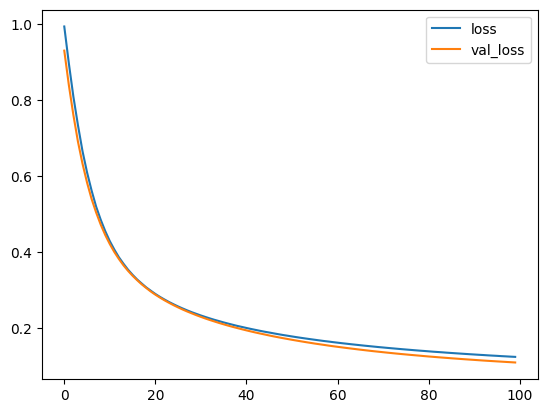

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

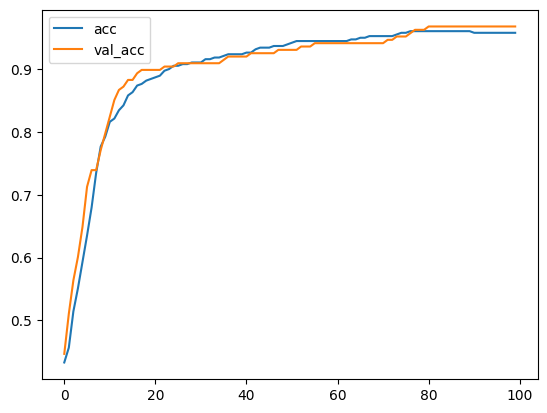

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# MAKING PREDICTIONS

In [25]:
P = model.predict(X_test)
print(P)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[8.29976678e-01]
 [4.68768599e-03]
 [9.44564193e-02]
 [9.61931646e-01]
 [9.81529295e-01]
 [9.94101697e-07]
 [2.91533925e-05]
 [9.92398113e-02]
 [3.86830151e-01]
 [9.61920202e-01]
 [9.42863286e-01]
 [7.53368586e-02]
 [9.40494597e-01]
 [4.20308441e-01]
 [9.70133603e-01]
 [2.87957396e-03]
 [9.63060081e-01]
 [9.95955169e-01]
 [9.99729753e-01]
 [4.59045725e-04]
 [7.29718029e-01]
 [9.00600612e-01]
 [1.69791056e-05]
 [9.98412788e-01]
 [9.72886980e-01]
 [9.17084813e-01]
 [9.53578293e-01]
 [9.79910135e-01]
 [9.57238495e-01]
 [5.33001265e-04]
 [9.82120931e-01]
 [9.93802309e-01]
 [9.75324452e-01]
 [9.50771689e-01]
 [9.94859874e-01]
 [9.87786949e-01]
 [3.77762735e-01]
 [9.81974721e-01]
 [9.50078666e-03]
 [8.49022925e-01]
 [9.91045177e-01]
 [1.74499154e-01]
 [9.63369548e-01]
 [9.87054527e-01]
 [9.41380084e-01]
 [9.70345020e-01]
 [9.91136730e-01]
 [9.92940009e-01]
 [9.14456427e-01]
 [9.76495326e-01]
 [1.53097035e-02]
 [1.97636575e-04]
 [5.52299917e-01]
 [7.9582

In [27]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]


In [31]:
print("Manual check:", np.mean(P == y_test))
print("Model check:", model.evaluate(X_test, y_test))

Manual check: 0.9680851063829787
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.1041 
Model check: [0.1087823137640953, 0.9680851101875305]


# SAVING MODEL

In [32]:
model.save('linear.h5')

In [34]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  18K Nov 29 18:19 linear.h5
drwxr-xr-x 1 root root 4.0K Nov 25 19:13 sample_data


In [36]:
model = tf.keras.models.load_model('linear.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9696 - loss: 0.1041  


[0.1087823137640953, 0.9680851101875305]